## Import Export

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pickle
from __future__ import division
import csv
from tools import *
import os

In [8]:
reload(tpm_identification)

<module 'tools.tpm_identification' from 'tools\tpm_identification.pyc'>

In [10]:
data_path = os.path.join(os.getcwd(),'..','data')
first_period_path = os.path.join(data_path,'Users_data','etapas_2013_abril_allyearsids_10_100000.csv')
second_period_path = os.path.join(data_path,'Users_data','etapas_2013_septiembre_allyearsids_10_100000.csv')

In [11]:
dict_metro = auxiliar_functions.load_metro_dictionary()

In [14]:
first_period_frame = pd.read_csv(first_period_path)
first_period_frame['tiempo_subida'] = pd.to_datetime(first_period_frame.tiempo_subida)
first_period_frame = first_period_frame.sort_values(by=['id', 'tiempo_subida'])
first_period_frame.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto
23,2013-04-14 06:45:44,1132106,348108.0,6289153.0,BUS,T203 00R,DOMINGO,1,1,346818.0,6299394.0,2013-04-14 07:07:02,T-22-205-SN-65,E-20-190-SN-40,328.0,307.0,0.0
22,2013-04-14 07:51:52,1132106,346751.0,6299389.0,BUS,T502 00I,DOMINGO,2,1,351363.0,6302549.0,2013-04-14 08:04:11,E-20-291-PO-20,T-15-135-PO-5,307.0,188.0,0.0
21,2013-04-14 19:56:47,1132106,351368.0,6302559.0,BUS,T502 00R,DOMINGO,3,1,346763.0,6299568.0,2013-04-14 20:09:11,T-15-135-OP-110,T-4-19-NS-100,188.0,55.0,0.0
20,2013-04-14 20:15:25,1132106,346713.0,6299427.0,BUS,T203 00I,DOMINGO,3,2,348095.0,6289148.0,2013-04-14 20:40:51,E-20-199-NS-2,T-24-205-NS-20,307.0,348.0,0.0
19,2013-04-15 21:04:59,1132106,348103.0,6289191.0,BUS,T206 00R,LABORAL,4,1,346844.0,6299320.0,2013-04-15 21:33:23,T-22-205-SN-65,T-20-190-SN-35,328.0,309.0,0.0


In [16]:
second_period_frame = pd.read_csv(second_period_path)
second_period_frame['tiempo_subida'] = pd.to_datetime(second_period_frame.tiempo_subida)
second_period_frame = second_period_frame.sort_values(by=['id', 'tiempo_subida'])
second_period_frame.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto
26,2013-09-23 20:58:46,1132106,348106.0,6289139.0,BUS,T203 00R,LABORAL,1,1,346824.0,6299354.0,2013-09-23 21:23:02,T-22-205-SN-65,E-20-190-SN-40,328.0,307.0,0.0
25,2013-09-23 21:24:25,1132106,346789.0,6299372.0,BUS,T502 00I,LABORAL,1,2,351366.0,6302548.0,2013-09-23 21:37:55,E-20-291-PO-20,T-15-135-PO-5,307.0,188.0,0.0
24,2013-09-24 07:15:40,1132106,351362.0,6302563.0,BUS,T502 00R,LABORAL,2,1,346661.0,6299484.0,2013-09-24 07:32:11,T-15-135-OP-110,T-4-19-NS-100,188.0,55.0,0.0
23,2013-09-24 08:00:08,1132106,346719.0,6299344.0,BUS,T206 06I,LABORAL,3,1,348078.0,6289284.0,2013-09-24 08:36:40,E-20-199-NS-2,T-24-205-NS-20,307.0,348.0,0.0
22,2013-09-24 09:13:22,1132106,347658.0,6289320.0,BUS,T352 00R,LABORAL,3,2,NaN,NaN,NaN,L-24-26-OP-25,NaN,348.0,NaN,NaN


,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto
26,2013-09-23 20:58:46,1132106,348106.0,6289139.0,BUS,T203 00R,LABORAL,1,1,346824.0,6299354.0,2013-09-23 21:23:02,T-22-205-SN-65,E-20-190-SN-40,328.0,307.0,0.0
25,2013-09-23 21:24:25,1132106,346789.0,6299372.0,BUS,T502 00I,LABORAL,1,2,351366.0,6302548.0,2013-09-23 21:37:55,E-20-291-PO-20,T-15-135-PO-5,307.0,188.0,0.0
24,2013-09-24 07:15:40,1132106,351362.0,6302563.0,BUS,T502 00R,LABORAL,2,1,346661.0,6299484.0,2013-09-24 07:32:11,T-15-135-OP-110,T-4-19-NS-100,188.0,55.0,0.0
23,2013-09-24 08:00:08,1132106,346719.0,6299344.0,BUS,T206 06I,LABORAL,3,1,348078.0,6289284.0,2013-09-24 08:36:40,E-20-199-NS-2,T-24-205-NS-20,307.0,348.0,0.0
22,2013-09-24 09:13:22,1132106,347658.0,6289320.0,BUS,T352 00R,LABORAL,3,2,NaN,NaN,NaN,L-24-26-OP-25,NaN,348.0,NaN,NaN


## Get Profiles from both periods

In [8]:
reload(tpm_identification)

<module 'tools.tpm_identification' from 'tools/tpm_identification.pyc'>

In [52]:
users_profiles = tpm_identification.get_profiles(first_period_frame['id'],first_period_frame['zona_subida'],first_period_frame['zona_bajada'])

In [53]:
numero_usuarios = len(users_profiles)
numero_usuarios

5169

In [54]:
profiles = tpm_identification.get_sequences(second_period_frame['id'],second_period_frame['zona_subida'],second_period_frame['zona_bajada'])

In [55]:
print len(profiles)
limit = min(len(users_profiles),len(profiles))
print limit

5344
5169


## Check if the ids are the same for both periods

In [56]:
last_iddd = 0
ids_alg1 = []
for i in range(len(users_profiles)):
    assert last_iddd < users_profiles[i]['user_id']
    last_iddd = users_profiles[i]['user_id']
    ids_alg1.append(last_iddd)
    assert users_profiles[i]['user_id'] == profiles[i]['user_id']

In [33]:
with open('data/ids_alg1.pickle', 'w') as f:
    pickle.dump(ids_alg1,f)

## Comparee

In [57]:
start_time = time.time()
iden = tpm_identification.get_identification_matrix(users_profiles,profiles)
delta_time = time.time() - start_time
print delta_time

4717.84558797


In [58]:
iden_matrix_zona = np.matrix(iden)
df_ident = pd.DataFrame(iden_matrix_zona)
df_ident.head(10)


,0,1,2,3,4,5,6,7,8,9,...,5159,5160,5161,5162,5163,5164,5165,5166,5167,5168
0,-68.142149,-750.000000,-780.000000,-774.00000,-750.00000,-780.00000,-750.00000,-783.0,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
1,-780.000000,-427.135729,-750.000000,-731.00000,-750.00000,-780.00000,-750.00000,-621.0,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
2,-780.000000,-775.000000,-363.640879,-774.00000,-750.00000,-780.00000,-750.00000,-783.0,-672.903090,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
3,-780.000000,-775.000000,-780.000000,-344.48455,-750.00000,-780.00000,-750.00000,-783.0,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
4,-780.000000,-775.000000,-780.000000,-774.00000,-351.59176,-780.00000,-750.00000,-783.0,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
5,-780.000000,-775.000000,-780.000000,-774.00000,-750.00000,-780.00000,-750.00000,-783.0,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
6,-780.000000,-775.000000,-780.000000,-774.00000,-750.00000,-720.09691,-500.29073,-783.0,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
7,-780.000000,-775.000000,-780.000000,-774.00000,-750.00000,-780.00000,-750.00000,-783.0,-768.000000,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
8,-780.000000,-775.000000,-750.096910,-774.00000,-750.00000,-780.00000,-750.00000,-783.0,-257.694065,-817.000000,...,-792.0,-770.0,-820.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0
9,-780.000000,-775.000000,-780.000000,-774.00000,-750.00000,-780.00000,-750.00000,-756.0,-768.000000,-315.583278,...,-792.0,-770.0,-800.0,-810.0,-780.0,-799.0,-800.0,-756.0,-730.0,-783.0


In [77]:
n_identified,selected_distance,identified_indexs,abstenidos,correct_indexs,correct_distance,wrong_indexs,wrong_distances = auxiliar_functions.get_n_correct_tpm(iden_matrix_zona,limit)
porcentaje_correcto = n_identified*100.0/limit
print str(round(porcentaje_correcto,2))+ "%"

66.26%


In [79]:
with open('resultados_alg_1_zona.pickle','w') as f:
    pickle.dump(n_identified,f)
    pickle.dump(selected_distance,f)
    pickle.dump(identified_indexs,f)
    pickle.dump(abstenidos,f)
    pickle.dump(correct_indexs,f)
    pickle.dump(correct_distance,f)
    pickle.dump(wrong_indexs,f)
    pickle.dump(wrong_distances,f)
    pickle.dump(iden_matrix_zona.diagonal(),f)

In [78]:
wrong_distances_without_800 = filter(lambda x: x>-800,wrong_distances)
print len(wrong_distances_without_800)

1717


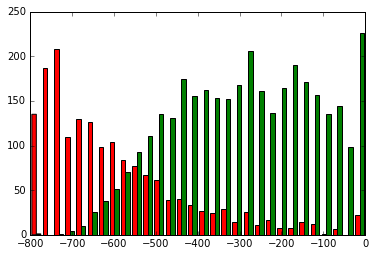

In [63]:
colors = ['red', 'green']
plt.hist([wrong_distances_without_800,correct_distance], 30, histtype='bar',color=colors)
plt.show()

In [72]:
counter = 0
for i in correct_distance:
    if i ==0.0:
        counter +=1
print counter

40


In [71]:
correct_distance

[-68.142148664601734,
 -427.13572880038168,
 -363.64087877870162,
 -344.48455006504025,
 -351.59176003468815,
 -257.69406507958291,
 -315.58327766020079,
 -649.69897000433605,
 -174.97148116926616,
 -228.89075625191822,
 -546.20411998265593,
 -439.76042248342321,
 -348.89769495510524,
 -63.010299956639813,
 -178.61235994796778,
 -216.36427492623204,
 -600.30102999566395,
 -304.84334445858246,
 -5.1629201560966758,
 -124.35785774700021,
 -400.77815125038359,
 -571.55090746888061,
 -290.38764005203228,
 -250.14806253545544,
 -426.41076385087945,
 -0.90308998699194354,
 -487.50514997831982,
 -262.77121254719663,
 -136.68867004769621,
 -372.77477235796283,
 -339.16375752398199,
 -3.0920050882549504,
 -297.71907981048196,
 -483.61235994796772,
 -288.70436503622273,
 -355.00287114631914,
 -214.62602115806038,
 -337.10393035588379,
 -298.61572120142057,
 -536.90308998699197,
 -528.09691001300803,
 -375.43838410703472,
 -177.62160197493932,
 -379.51930129554614,
 -44.106156405481158,
 -313.698

## Este gráfico muestra el indicador de similitud para los correctamente identificados, los incorrectamente identificados y en verde el valor de la distancia que debiese haber sido identificada

Se puede observar que la distribución verde está más a la izquierda por lo que habla de un gran número de personas gente que cambió de comportamiento. Esto se condice con los resultados del tercer algoritmo.

In [64]:
wrong_distances_selected = []
counter = 0
for i in range(limit):
    if i in wrong_indexs:
        wrong_distances_selected.append(selected_distance[counter])
        counter += 1
    if i in correct_indexs:
        counter += 1

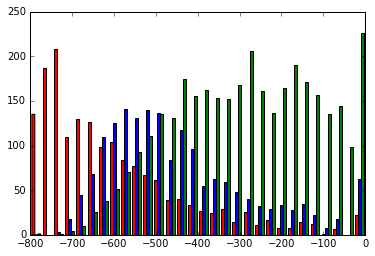

In [65]:
colors = ['red', 'blue','green']
plt.hist([wrong_distances_without_800,wrong_distances_selected,correct_distance], 30, histtype='bar',color=colors)
plt.show()

## Los siguientes gráficos muestran los indicadores de la diagonal de los correcta e incorrectamente clasificados. 

#### Cuidado que estos gráficos son engañosos porque solo consideran la diagonal. Entonces puede que haya otros incorrectos pero que no sean parte de la diagonal.

In [27]:
diagonal = iden.diagonal().copy()
correct_distance_ii = []
wrong_distance_ii = []
diagonal_d1_ii = []
for i in range(len(diagonal)):
    if diagonal[i]>-100:
        diagonal_d1_ii.append(i)
        if i in correct_indexs:
            correct_distance_ii.append(diagonal[i])
        else:
            wrong_distance_ii.append(diagonal[i])
print "diagonal: "+str(len(diagonal_d1_ii)   )
print "correctos: "+str(len(correct_distance_ii))
print "incorrectos: "+str(len(wrong_distance_ii))

diagonal: 593
correctos: 564
incorrectos: 29


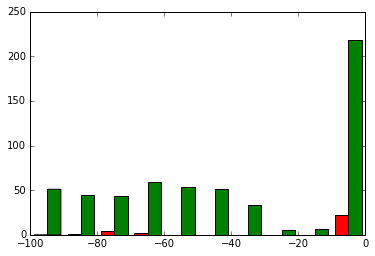

In [28]:
colors = ['red', 'green']
plt.hist([wrong_distance_ii,correct_distance_ii], histtype='bar',color=colors)
plt.show()

In [29]:
diagonal = iden.diagonal().copy()
correct_distance = []
wrong_distance = []
diagonal_d1 = []
for i in range(len(diagonal)):
    if diagonal[i]>-1:
        diagonal_d1.append(i)
        if i in correct_indexs:
            correct_distance.append(diagonal[i])
        else:
            wrong_distance.append(diagonal[i])
print "diagonal: "+str(len(diagonal_d1)   )
print "correctos: "+str(len(correct_distance))
print "incorrectos: "+str(len(wrong_distance))

diagonal: 82
correctos: 71
incorrectos: 11


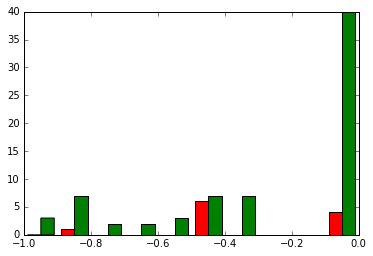

In [30]:
colors = ['red', 'green']
plt.hist([wrong_distance,correct_distance], histtype='bar',color=colors)
plt.show()

In [31]:
diagonal = iden.diagonal().copy()
correct_distance = []
wrong_distance = []
diagonal_d1 = []
for i in range(len(diagonal)):
    if diagonal[i]>-0.1:
        diagonal_d1.append(i)
        if i in correct_indexs:
            correct_distance.append(diagonal[i])
        else:
            wrong_distance.append(diagonal[i])
print "diagonal: "+str(len(diagonal_d1)   )
print "correctos: "+str(len(correct_distance))
print "incorrectos: "+str(len(wrong_distance))

diagonal: 44
correctos: 40
incorrectos: 4


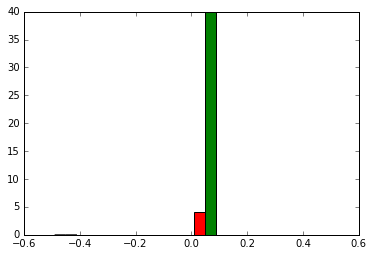

In [32]:
colors = ['red', 'green']
plt.hist([wrong_distance,correct_distance], histtype='bar',color=colors)
plt.show()

In [66]:
with open('data/iden_matrix_zona.pickle','w') as f:
    pickle.dump(iden_matrix_zona,f)

In [26]:
with open('data/iden_matrix_zona.pickle','r') as f:
    iden = pickle.load(f)

### Comparee con paraderos

In [8]:
reload(auxiliar_functions)

<module 'tools.auxiliar_functions' from 'tools/auxiliar_functions.pyc'>

In [11]:
start_time = time.time()
users_profiles = tpm_identification.get_profiles(first_period_frame['id'],first_period_frame['par_subida'],first_period_frame['par_bajada'])
profiles = tpm_identification.get_sequences(second_period_frame['id'],second_period_frame['par_subida'],second_period_frame['par_bajada'])
delta_time = time.time() - start_time
print delta_time

0.99444103241


In [10]:
users_profiles[0]

{'mls': ['T-22-205-SN-65',
  'E-20-190-SN-40',
  'E-20-291-PO-20',
  'T-15-135-PO-5',
  'T-15-135-OP-110',
  'T-4-19-NS-100',
  'E-20-199-NS-2',
  'T-24-205-NS-20',
  'T-20-190-SN-35',
  'E-20-289-PO-5',
  'T-22-205-SN-55',
  'T-24-205-NS-30',
  'T-15-135-OP-105'],
 'nvisitas': [5, 5, 4, 6, 5, 6, 6, 4, 1, 2, 1, 1, 1],
 'tpm': array([[ 0.        ,  0.8       ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.2       ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.8       ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.2       ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.83333333,
        

In [45]:
start_time = time.time()
iden_paradero = tpm_identification.get_identification_matrix(users_profiles,profiles)
delta_time = time.time() - start_time
print delta_time

4841.82331514


In [46]:
iden_matrix_paradero = np.matrix(iden_paradero)
df_ident_paradero = pd.DataFrame(iden_matrix_paradero)

In [47]:
with open('data/iden_matrix_paradero.pickle','w') as f:
    pickle.dump(iden_matrix_paradero,f)

In [73]:
with open('data/iden_matrix_paradero.pickle','r') as f:
    iden_matrix_paradero = pickle.load(f)

In [74]:
n_identified,selected_distance,identified_indexs,abstenidos,correct_indexs,correct_distance,wrong_indexs,wrong_distances = auxiliar_functions.get_n_correct_tpm(iden_matrix_paradero,limit)
porcentaje_correcto = n_identified*100.0/limit
print str(round(porcentaje_correcto,2))+ "%"

68.95%


In [21]:
with open('data/resultados_alg_1.pickle','w') as f:
    pickle.dump(n_identified,f)
    pickle.dump(selected_distance,f)
    pickle.dump(identified_indexs,f)
    pickle.dump(abstenidos,f)
    pickle.dump(correct_indexs,f)
    pickle.dump(correct_distance,f)
    pickle.dump(wrong_indexs,f)
    pickle.dump(wrong_distances,f)
    pickle.dump(iden_matrix_paradero.diagonal(),f)

In [2]:
with open('data/resultados_alg_1.pickle','r') as f:
    n_identified = pickle.load(f)
    selected_distance = pickle.load(f)
    identified_indexs = pickle.load(f)
    abstenidos = pickle.load(f)
    correct_indexs = pickle.load(f)
    correct_distance = pickle.load(f)
    wrong_indexs = pickle.load(f)
    wrong_distances = pickle.load(f)
    diagonal = pickle.load(f)

In [3]:
counter = 0
for i in correct_distance:
    if i ==0.0:
        counter +=1
print counter

31


In [6]:
counter = 0
for i in wrong_distances:
    if i ==0.0:
        counter +=1
print counter

1


In [5]:
iden_matrix_paradero.shape

NameError: name 'iden_matrix_paradero' is not defined

In [17]:
len(abstenidos)

1

In [60]:
len(abstenidos)*100/limit

0.01934610176049526

In [57]:
len(correct_indexs)

3564

In [58]:
len(identified_indexs)

5168

In [21]:
len(wrong_indexs)

1604

In [7]:
wrong_distances_without_800 = filter(lambda x: x>-800,wrong_distances)
print len(wrong_distances_without_800)

1525


(array([ 662.,  399.,  188.,  117.,   60.,   35.,   21.,   18.,   14.,   11.]),
 array([-799.30103 , -719.370927, -639.440824, -559.510721, -479.580618,
        -399.650515, -319.720412, -239.790309, -159.860206,  -79.930103,
           0.      ]),
 <a list of 10 Patch objects>)

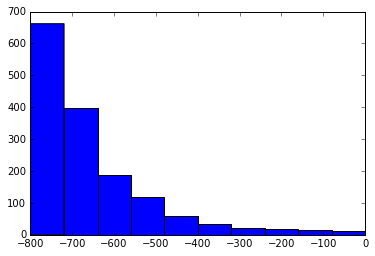

In [8]:
plt.hist(wrong_distances_without_800)

([array([ 662.,  399.,  188.,  117.,   60.,   35.,   21.,   18.,   14.,   11.]),
  array([  19.,  173.,  322.,  496.,  490.,  491.,  520.,  425.,  371.,  257.])],
 array([-799.30103 , -719.370927, -639.440824, -559.510721, -479.580618,
        -399.650515, -319.720412, -239.790309, -159.860206,  -79.930103,
           0.      ]),
 <a list of 2 Lists of Patches objects>)

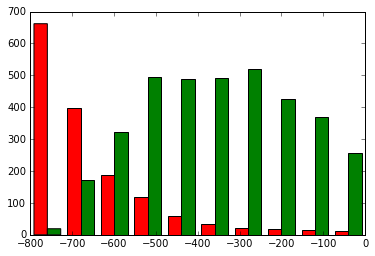

In [39]:
colors = ['red', 'green']
plt.hist([wrong_distances_without_800,correct_distance], histtype='bar',color=colors)

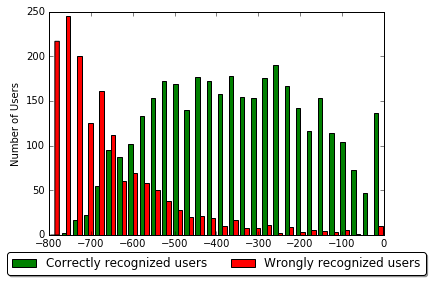

In [9]:
colors = ['green', 'red']
plt.hist([correct_distance,wrong_distances_without_800], 30, histtype='bar',color=colors,label=['Correctly recognized users','Wrongly recognized users'])
plt.xlabel('Similarity Indicator')
plt.ylabel('Number of Users')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
#plt.legend((a,b),('Correctly identified users','Correctly identified users'))
plt.savefig('hist_tpm.eps', format='eps', dpi=1000)

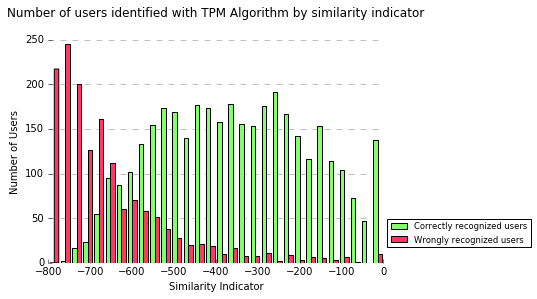

In [14]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
colors = [(132, 255, 108),(255, 57, 100)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)  
plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  # Limit the range of the plot to only where the data is.  
ax.set_xlabel('Similarity Indicator')
ax.set_ylabel('Number of Users')
ax.set_title('Number of users identified with TPM Algorithm by similarity indicator',y=1.08)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray',linestyle='dashed')
# Avoid unnecessary whitespace.  
plt.xlim(-800.0, 0.0)  
plt.ylim(0, 250)  
#plt.yticks(range(36, 54, 2), [str(x) + "%" for x in range(36, 54, 2)], fontsize=11)  
#plt.xticks(a, [str(x) + "%" for x in a], fontsize=11)
#plt.plot(a,resultados_2,lw=2.5,color=(31/255.,119/255.,180/255.))
plt.hist([correct_distance,wrong_distances_without_800], 30, histtype='bar',color=colors,label=['Correctly recognized users','Wrongly recognized users'])
plt.legend(loc='lower left',fancybox=False, shadow=False, prop = fontP, bbox_to_anchor=(1.0, 0.05))
#plt.show()
plt.savefig("indicator correct wrong alg1.eps",format='eps', dpi=1000, bbox_inches="tight")


## Distancia de cada usuario entre abril y septiembre, y en verde, las distancias que fueron seleccionadas como correctas pero no lo eran

In [41]:
wrong_distances_selected = []
counter = 0
for i in range(limit):
    if i in wrong_indexs:
        wrong_distances_selected.append(selected_distance[counter])
        counter += 1
    if i in correct_indexs:
        counter += 1

In [42]:
len(wrong_distances_selected)

1604

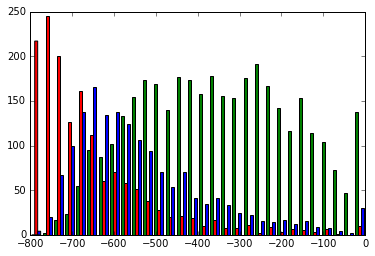

In [43]:
colors = ['green','red','blue']
plt.hist([correct_distance,wrong_distances_without_800,wrong_distances_selected], 30, histtype='bar',color=colors)
plt.show()

#### En el gráfico anterior se puede observar que hay usuarios con distancia 0, es decir que hay solo una opción y que no son el mismo id

### Plot wrong distances

In [46]:
wd_menor_100 = filter(lambda x: x > -100,wrong_distances_selected)

(array([  3.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   0.,  30.]),
 array([-97.09487623, -87.38538861, -77.67590099, -67.96641336,
        -58.25692574, -48.54743812, -38.83795049, -29.12846287,
        -19.41897525,  -9.70948762,   0.        ]),
 <a list of 10 Patch objects>)

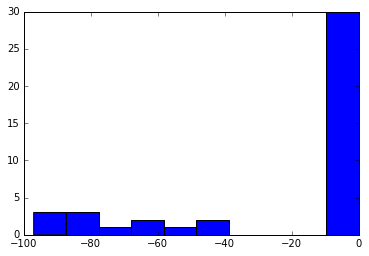

In [47]:
plt.hist(wd_menor_100)

### Hay usuarios que se roban la pelicula

In [73]:
x = np.array(identified_indexs)
y = np.bincount(x)
ii = np.nonzero(y)[0]
frequency_identified_indexs = zip(ii,y[ii])
frequency_identified_indexs.sort(key = lambda t: t[1], reverse=True)
frequency_identified_indexs

[(1480, 6),
 (2809, 6),
 (4844, 6),
 (161, 5),
 (563, 5),
 (1372, 5),
 (1954, 5),
 (2826, 5),
 (5030, 5),
 (201, 4),
 (232, 4),
 (239, 4),
 (456, 4),
 (525, 4),
 (836, 4),
 (947, 4),
 (980, 4),
 (1067, 4),
 (1205, 4),
 (1363, 4),
 (1441, 4),
 (1444, 4),
 (1742, 4),
 (1884, 4),
 (2405, 4),
 (2644, 4),
 (2670, 4),
 (2887, 4),
 (3088, 4),
 (3150, 4),
 (3237, 4),
 (4106, 4),
 (4318, 4),
 (4401, 4),
 (4460, 4),
 (4584, 4),
 (4636, 4),
 (4794, 4),
 (5048, 4),
 (0, 3),
 (11, 3),
 (41, 3),
 (50, 3),
 (74, 3),
 (203, 3),
 (222, 3),
 (229, 3),
 (256, 3),
 (318, 3),
 (331, 3),
 (335, 3),
 (389, 3),
 (394, 3),
 (410, 3),
 (424, 3),
 (431, 3),
 (441, 3),
 (482, 3),
 (489, 3),
 (507, 3),
 (532, 3),
 (591, 3),
 (605, 3),
 (638, 3),
 (649, 3),
 (677, 3),
 (715, 3),
 (755, 3),
 (766, 3),
 (817, 3),
 (823, 3),
 (863, 3),
 (914, 3),
 (940, 3),
 (968, 3),
 (1035, 3),
 (1040, 3),
 (1054, 3),
 (1058, 3),
 (1105, 3),
 (1134, 3),
 (1146, 3),
 (1161, 3),
 (1162, 3),
 (1176, 3),
 (1189, 3),
 (1197, 3),
 (1269, 

In [48]:
wrong_indexs_0 = []
for i in range(len(wd_menor_100)):
    if wd_menor_100[i]==0:
        wrong_indexs_0.append(wrong_distances[i])
#Hay uno en el histograma que es menor que 0.092 pero es distinto de 0
len(wrong_indexs_0)

9

### Resultados diagonal

Falta encontrar el índice donde se minimiza el error

diagonal: 5089
correctos: 3564
incorrectos: 1525


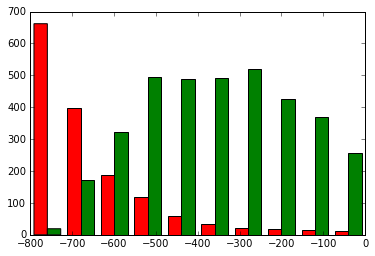

In [49]:
diagonal = iden_matrix_paradero.diagonal().copy()
correct_distance = []
wrong_distance = []
diagonal_d1 = []
for i in range(len(diagonal)):
    if diagonal[i]>-800:
        diagonal_d1.append(i)
        if i in correct_indexs:
            correct_distance.append(diagonal[i])
        else:
            wrong_distance.append(diagonal[i])
print "diagonal: "+str(len(diagonal_d1)   )
print "correctos: "+str(len(correct_distance))
print "incorrectos: "+str(len(wrong_distance))
colors = ['red', 'green']
plt.hist([wrong_distance,correct_distance], histtype='bar',color=colors)
plt.show()

In [50]:
correct_distance = []
wrong_distance = []
diagonal_d1 = []
for i in range(len(diagonal)):
    if diagonal[i]>-300:
        diagonal_d1.append(i)
        if i in correct_indexs:
            correct_distance.append(diagonal[i])
        else:
            wrong_distance.append(diagonal[i])
print len(diagonal_d1)   
print len(correct_distance)
print len(wrong_distance)

1500
1442
58


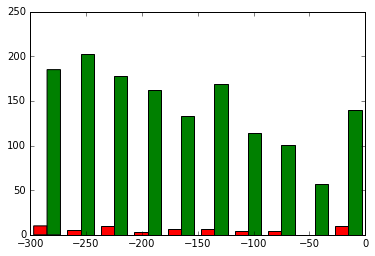

In [51]:
colors = ['red', 'green']
plt.hist([wrong_distance,correct_distance], histtype='bar',color=colors)
plt.show()